<table  align="left" width="100%"> <tr>
        <td  style="background-color:#ffffff;"><a href="https://qworld.net" target="_blank"><img src="../images/qworld.jpg" width="35%" align="left"></a></td>
        <td  align="right" style="background-color:#ffffff;vertical-align:bottom;horizontal-align:right">
            prepared by <a href="https://iitis.pl/pl/person/aglos" target="_blank"  >Adam Glos</a>
        </td>        
</tr></table>

<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros. </td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $

# Max-Cut Problem

Let us consider the following graph.

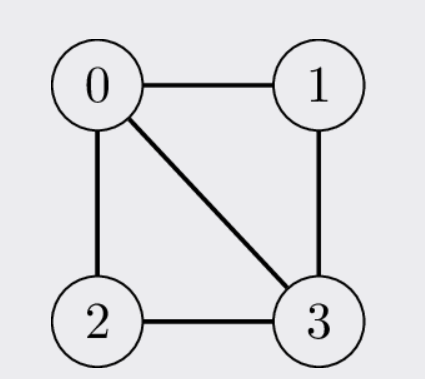

The graph has five edges in total. We will assign a color to each vertex: either blue or red, and count the number of edges that connect vertices with different colors. In the following example, there are two edges connecting vertices that are colored using different colors (blue and red).

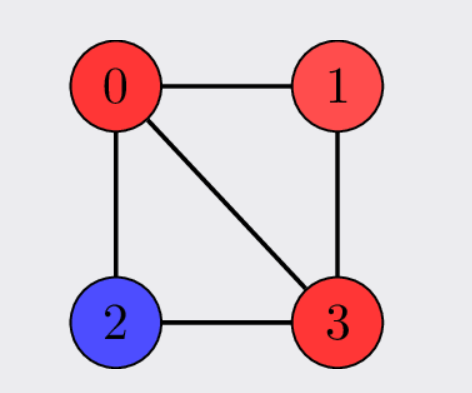

On the other hand, in the following example, there are four edges connecting the vertices colored using different colors, which is indeed the maximum for a graph with four vertices.

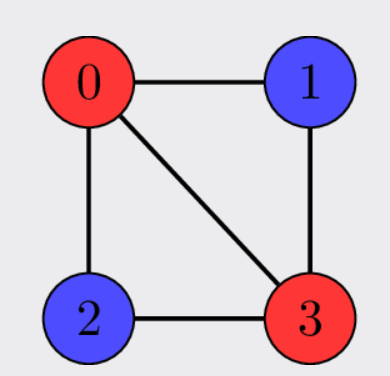

## Definition ##

The problem of partitioning the vertices of the graph into two disjoint sets (which is called a cut) such that the number of edges between the two sets (whose endpoints lie in different sets) is maximal is known as the **Max-Cut problem**.

We will focus on the decision version of this problem which is defined as follows:

For a given graph $G$, the problem is to determine whether there exists a cut of size at least $k$. 

It turns out that this problem is challenging (in fact it is **NP**-complete). There are $2^n$ possible coloring, and so a trivial (brute force) search checks each of these cases in the worst case. Here we show that we can solve this problem faster by using Grover's Search algorithm, approximately by making $\pi\sqrt{2^n}/4 \approx 0.8 \times 1.414^n$ oracle queries.

## A simple case: Bipartite graphs

A graph is bipartite if the set of vertices can be divided into two disjoint sets such that each edge connects a vertex from the first set with a vertex from the second set. An example is presented below:

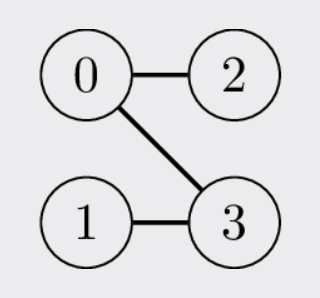

We see that vertex 0 and 1 (or 2 and 3) could form such a set. An example of a graph which is not bipartite is given below.

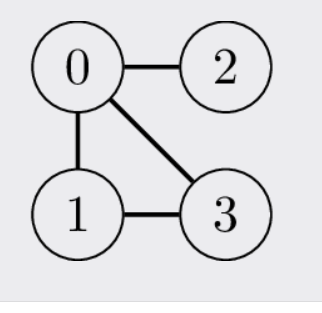

We first focus on bipartite graphs before moving on to the general case.

Bipartite graphs have unique properties such that they admit a 2-coloring, a coloring using two colors in which the endpoints of all the edges are colored with different colors. (Note that now we are talking about a coloring which should make sure that endpoints are colored using different colors. This is different than randomly assigning colors to vertices.) Hence, for bipartite graphs solution to the Max-Cut problem is simply the total number of edges. Therefore, if we can decide efficiently if a graph is bipartite, then we can also efficiently solve the Max-Cut problem for that particular graph.

## Checking bipartiteness

We will check whether a graph is bipartite or not by finding a 2-coloring in which the endpoints of all the edges are colored with different colors.

We will use the following idea to represent colors of vertices in a quantum circuit. For a graph with $n$ vertices, we will use $n$ qubits. The $i$'th qubit will encode the color of $i$'th vertex as follows: state $\ket{0}$ means the vertex has red color, and state $\ket{1}$ means it has blue color.

### Task 1
    
Let's implement the idea given above. We have a graph with 4 vertices, and so we have a circuit with 4 qubits. 

Represent the following coloring of the given graph in the quantum circuit.

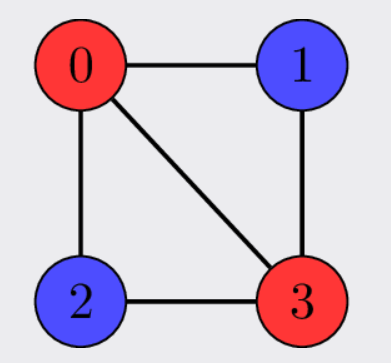

In [1]:
import cirq
from cirq import X, I

qq = cirq.LineQubit.range(4)
circuit = cirq.Circuit()

circuit.append(X(qq[1]))
circuit.append(X(qq[2]))

circuit.append(cirq.measure(*qq, key='result'))
print(circuit)

s = cirq.Simulator()
samples = s.run(circuit, repetitions=1)
result = samples.measurements["result"]
print(result)

# decode the solution
for qubit in range(4):
    if result[0][qubit] == 0:
        print("Qubit",qubit, "is red")
    else:
        print("Qubit",qubit, "is blue")

0: ───────M('result')───
          │
1: ───X───M─────────────
          │
2: ───X───M─────────────
          │
3: ───────M─────────────
[[0 1 1 0]]
Qubit 0 is red
Qubit 1 is blue
Qubit 2 is blue
Qubit 3 is red


[click for our solution](B02_Max_Cut_Problem_Solutions.ipynb#task1)

## Edge checking 

Next, we will implement a protocol which checks whether an edge has endpoints with different colors. For each edge, we will use a separate qubit, on which we will store a Boolean value: $\ket{1}$ if edge connects vertices with different colors, and $\ket{0}$, otherwise.

We use the XOR function $\oplus$:
$$
x \oplus y = \begin{cases}
1, & x \neq y \\
0, & x = y \\
\end{cases}
$$
where $x$ and $y$ are the colors of vertices and the result is the Boolean value of the edge connecting them.

We can easily implement $x \oplus y=z$ by using two $CNOT$ gates as given below.


In [2]:
import cirq
from cirq import X, CX

qq = cirq.LineQubit.range(3)
circuit = cirq.Circuit()

circuit.append(CX(qq[0], qq[2]))
circuit.append(CX(qq[1], qq[2]))

print(circuit)

0: ───@───────
      │
1: ───┼───@───
      │   │
2: ───X───X───


Here the first two qubits are $x$ and $y$, and $z$ is the third qubit. 

Let’s verify the correctness of the above circuit by checking all possible coloring (inputs).


In [3]:
import cirq
from cirq import X, CX
s = cirq.Simulator()

for a in range(2):
    for b in range(2):
        print()
        print("First vertex is set to ", a)
        print("Second vertex is set to ", b)
        
        # encoding coloring
        qq = cirq.LineQubit.range(3)
        circuit = cirq.Circuit()
        
        if a == 1:
            circuit.append(X(qq[0]))
        if b == 1:
            circuit.append(X(qq[1]))

        # edge checking
        circuit.append(CX(qq[0], qq[2]))
        circuit.append(CX(qq[1], qq[2]))
        circuit.append(cirq.measure(*qq, key='result'))
        
        samples = s.run(circuit, repetitions=1)
        result = samples.measurements["result"]
        # 0 - first (and only measurement)
        # 2 - last qubit
        output = result[0][2] 
                
        
        print(circuit)
        if output == 1:
            print("Edge connects different colors. Output:", output)
        else:
            print("Edge connects the same colors. Output:", output)


First vertex is set to  0
Second vertex is set to  0
0: ───@───────M('result')───
      │       │
1: ───┼───@───M─────────────
      │   │   │
2: ───X───X───M─────────────
Edge connects the same colors. Output: 0

First vertex is set to  0
Second vertex is set to  1
      ┌──┐
0: ─────@────────M('result')───
        │        │
1: ────X┼────@───M─────────────
        │    │   │
2: ─────X────X───M─────────────
      └──┘
Edge connects different colors. Output: 1

First vertex is set to  1
Second vertex is set to  0
0: ───X───@───────M('result')───
          │       │
1: ───────┼───@───M─────────────
          │   │   │
2: ───────X───X───M─────────────
Edge connects different colors. Output: 1

First vertex is set to  1
Second vertex is set to  1
0: ───X───@───────M('result')───
          │       │
1: ───X───┼───@───M─────────────
          │   │   │
2: ───────X───X───M─────────────
Edge connects the same colors. Output: 0


## Designing an oracle for checking bipartiteness

In Grover's Algorithm, our aim is to find an element marked by the oracle. If we have an oracle detecting any edge connecting two differently colored vertices, then we can use Grover's search to find such colorings (if exists)
which "marks" colorings in which the endpoints of all the edges are colored using a different color, then we can use Grover's search to find such colorings (if such a coloring exists). Therefore, we need to define an oracle which will check and "mark" colorings which satisfy this property. 

As we described above, we use seperate qubits for each vertex and for each edge. The states of the qubits corresponding to vertices represent the colorings. The input to the oracle are the qubits representing the vertices, and the rest of the qubits are used by the oracle. Before the oracle starts its computation, all qubits representing the edges and the output qubit are in $ \ket{0}$ state, and they should also be in $\ket{0} $ state at the end to be used again for the next oracle call.


We can summarize the computation by the oracle in four steps:

1. By using the XOR operator, we assign the appropriate Boolean value for each edge. 
2. Then, we use an additional output qubit, which is set to 1 if each edge has the value of 1, i.e., each edge connects two vertices with different colors. This part can be implemented by a multi-controlled $NOT$ operator (flip the value of target qubit only if all controlled qubits are in states $\ket{1}$). 

### Task 2

For the given graph below, implement the first two steps of the oracle described above. 

The first four qubits are used for vertices.

The next three qubits are used for edges.

The last qubit is used for the output.

Remark that the last qubit should be in state $ \ket{1} $ (resp., $\ket{0}$) if the coloring of the vertices is correct (resp., incorrect).

Test your implementation with different colorings.

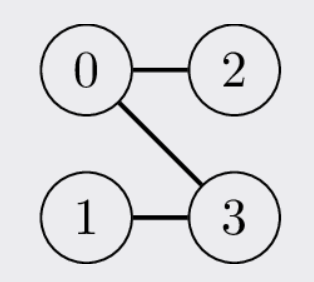

In [4]:
import cirq
from cirq import X, CX
s = cirq.Simulator()

qq = cirq.LineQubit.range(8)
circuit = cirq.Circuit()
# correct coloring
circuit.append(X(qq[0]))
circuit.append(X(qq[1]))

# incorrect coloring
# circuit.append(X(qq[0]))



# check 0-2 edge and store at 4th qubit
circuit.append(CX(qq[0], qq[4]))
circuit.append(CX(qq[2], qq[4]))
# check 0-3 edge and store at 5th qubit
circuit.append(CX(qq[0], qq[5]))
circuit.append(CX(qq[3], qq[5]))
# check 1-3 edge and store at 6th qubit
circuit.append(CX(qq[1], qq[6]))
circuit.append(CX(qq[3], qq[6]))

# check all edge qubits
circuit.append(X(qq[7]).controlled_by(*(qq[4:7])))


circuit.append(cirq.measure(*qq, key='result'))
samples = s.run(circuit, repetitions=1)
result = samples.measurements["result"]
# 0 - first (and only measurement)
# 7 - last qubit
output = result[0][7] 
print("Measurement output: ", output)
if output == 1:
    print("correct coloring (graph is bipartite)")
else:
    print("incorrect coloring")
print(circuit)

Measurement output:  1
correct coloring (graph is bipartite)
          ┌──┐   ┌──┐
0: ───X────@───────@────────────────M('result')───
           │       │                │
1: ───X────┼@──────┼────────────────M─────────────
           ││      │                │
2: ────────┼┼─────@┼────────────────M─────────────
           ││     ││                │
3: ────────┼┼─────┼┼────@───@───────M─────────────
           ││     ││    │   │       │
4: ────────X┼─────X┼────┼───┼───@───M─────────────
            │      │    │   │   │   │
5: ─────────┼──────X────X───┼───@───M─────────────
            │               │   │   │
6: ─────────X───────────────X───@───M─────────────
                                │   │
7: ─────────────────────────────X───M─────────────
          └──┘   └──┘


[click for our solution](B02_Max_Cut_Problem_Solutions.ipynb#task2)

Let's continue with the remaining steps of the oracle.

3. The oracle flips the sign of the amplitude of the states which lead to $ \ket{1} $ as the output. This can be easily done by applying a $Z$ gate: when in state $\ket{1}$, the sign is flipped, and it does not change, otherwise. 
4. We reverse the whole computation done in the first 2 steps so that the oracle leaves all the qubits used in the computation in state $\ket{0}$. This can be done by reversing every quantum operator before the $Z$ gate. (In Cirq, the method “inverse” can be used.) In this way, the only effect of the oracle is flipping the amplitude of the sign of the qubits representing the correct coloring.

Now, our oracle is ready to be used as a part of Grover’s search algorithm. 

In the following code, we apply the oracle once and observe its effect. We start with an equal superposition of all possible coloring for the vertices (the first qubits).

In [5]:
import cirq
from cirq import X, H, Z, inverse, CX
s = cirq.Simulator()

qq = cirq.LineQubit.range(8)

def oracle():
    # check 0-2 edge and store at 4th qubit
    yield CX(qq[0], qq[4])
    yield CX(qq[2], qq[4])
    # check 0-3 edge and store at 5th qubit
    yield CX(qq[0], qq[5])
    yield CX(qq[3], qq[5])
    # check 1-3 edge and store at 6th qubit
    yield CX(qq[1], qq[6])
    yield CX(qq[3], qq[6])

    # check all edge qubits
    yield X(qq[7]).controlled_by(*(qq[4:7]))
    
def oracle_computation():
    yield oracle()
    yield Z(qq[7])
    yield inverse(oracle())
    
circuit = cirq.Circuit()
circuit.append(H.on_each(*(qq[0:4])))
circuit.append(oracle_computation())

quantum_state = s.simulate(circuit).final_state_vector
for i in range(len(quantum_state)):
    if quantum_state[i] != 0.:
        # format(i, 'b').zfill(8) takes care of nice printing
        print(format(i, 'b').zfill(8), quantum_state[i])

00000000 (0.25+0j)
00010000 (0.25+0j)
00100000 (0.25+0j)
00110000 (-0.25+0j)
01000000 (0.25+0j)
01010000 (0.25+0j)
01100000 (0.25+0j)
01110000 (0.25+0j)
10000000 (0.25+0j)
10010000 (0.25+0j)
10100000 (0.25+0j)
10110000 (0.25+0j)
11000000 (-0.25+0j)
11010000 (0.25+0j)
11100000 (0.25+0j)
11110000 (0.25+0j)


Note several important things here. The last four qubits are set to zero: these are edge checking and output qubit, and since they are set to zero, we can reuse them in further computation.

As observed from the outcome, only the sign of the following states are flipped:
$$
	\ket{0011}\ket{0000} \mbox{ and } \ket{1100}\ket{0000}.
$$

In the first case, the vertices 0 and 1 are colored blue and the vertices 2 and 3 are colored red. In the second case, the first pair is colored red and the second one colored blue.


### Task 3 

For the given graphs below, iterate Grover’s search algorithm 2 steps to find the correct colorings. (There are indeed $k=2$ possible colorings, and so the oracle should be applied $\frac{\pi}{4}\sqrt{\frac{2^4}{k}}\approx 2$ times.) 

You will use nine qubits: 4 for vertices, 4 for edges, and 1 for the output qubit.

The diffusion operator is provided below.

Observe which outcomes have the higher frequencies.


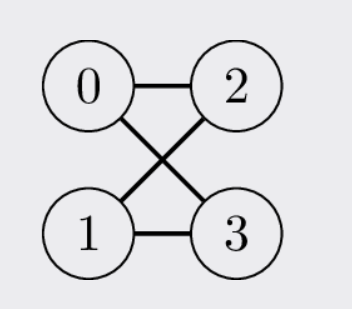

In [ ]:
import cirq
from cirq import X, H, Z, inverse, CX
s = cirq.Simulator()

qq = cirq.LineQubit.range(9)

def oracle_computation():
    # check 0-1 edge and store at 4th qubit
    yield CX(qq[0],qq[4])
    yield CX(qq[1],qq[4])
    # check 0-2 edge and store at 5th qubit
    yield CX(qq[0],qq[5])
    yield CX(qq[2],qq[5])
    # check 0-3 edge and store at 6th qubit
    yield CX(qq[0],qq[6])
    yield CX(qq[3],qq[6])
    # check 1-3 edge and store at 7th qubit
    yield CX(qq[1],qq[7])
    yield CX(qq[3],qq[7])

    # check all edge qubits
    yield X(qq[8]).controlled_by(*(qq[4:8]))
    
def oracle():
    yield oracle()
    yield Z(qq[8])
    yield inverse(oracle())  
    

def grover_diffusion():
    yield H.on_each(*qq)
    yield X.on_each(*qq)
    yield Z(qq[3]).controlled_by(*(qq[0:3]))
    yield X.on_each(*qq)
    yield H.on_each(*qq)

circuit = cirq.Circuit()
circuit.append(H.on_each(*(qq[0:4])))

for i in range(2):
    circuit.append(oracle_computation())
    circuit.append(grover_diffusion())
    

# we are only intertested in outputs of first 4 qubits
circuit.append(cirq.measure(*(qq[0:4]), key='result'))

# determine the statistics of the measurements
trials_number = 1000
samples = s.run(circuit, repetitions=trials_number)
result = samples.measurements["result"]

def bitstring(bits):
    return "".join(str(int(b)) for b in bits)

counts = samples.histogram(key="result",fold_func=bitstring)
print(counts)

Counter({'1111': 79, '1011': 73, '1000': 70, '1001': 66, '0111': 65, '1010': 63, '0001': 63, '1100': 62, '1110': 62, '0110': 60, '0011': 60, '0010': 58, '0100': 58, '0000': 56, '0101': 55, '1101': 50})


[click for our solution](B02_Max_Cut_Problem_Solutions.ipynb#task3)

'1111' and '1011' are mostly observed states

In [16]:
print("Probability of measuring 0011: ", counts.get('1111')/trials_number)
print("Probability of measuring 1100: ", counts.get('1011')/trials_number)

Probability of measuring 0011:  0.079
Probability of measuring 1100:  0.073


### Task 4

Repeat Task 3 for the following graph.

Does the following graph has any correct colorings or not? If not, what would you say in advance about the frequencies of the outcomes?


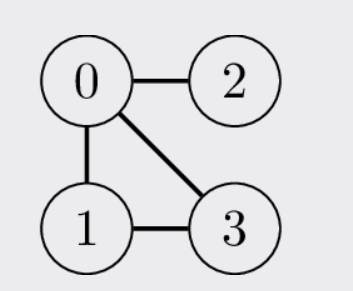

In [1]:
import cirq
from cirq import X, H, Z, inverse, CX
s = cirq.Simulator()

qq = cirq.LineQubit.range(9)
    
def oracle_computation():

    # check 0-2 edge and store it in 4
    yield CX(qq[0],qq[4])
    yield CX(qq[2],qq[4])

    # check 0-3 edge and store it in 5
    yield CX(qq[0],qq[5])
    yield CX(qq[3],qq[5])

    # check 0-1 edge and store it in 6
    yield CX(qq[0],qq[6])
    yield CX(qq[1],qq[6])

    # check 1-3 edge and store it in 7
    yield CX(qq[1],qq[7])
    yield CX(qq[3],qq[7])
    
    # check all edge qubits
    yield X(qq[8]).controlled_by(*(qq[4:8]))
    
def oracle():

    yield oracle()
    yield Z(qq[8])
    yield inverse(oracle()) 
    
    
def grover_diffusion():
    yield H.on_each(*qq)
    yield X.on_each(*qq)
    yield Z(qq[3]).controlled_by(*(qq[0:3]))
    yield X.on_each(*qq)
    yield H.on_each(*qq)

circuit = cirq.Circuit()
circuit.append(H.on_each(*(qq[0:4])))

for i in range(2):
    circuit.append(oracle())
    circuit.append(grover_diffusion())

# we are only intertested in outputs of first 4 qubits
circuit.append(cirq.measure(*(qq[0:4]), key='result'))

# determine the statistics of the measurements
trials_number = 1000
samples = s.run(circuit, repetitions=trials_number)
result = samples.measurements["result"]

# create an histogram of the result
def bitstring(bits):
    return "".join(str(int(b)) for b in bits)

counts = samples.histogram(key="result",fold_func=bitstring)
print(counts)

: 

[click for our solution](B02_Max_Cut_Problem_Solutions.ipynb#task4)

## Conclusion 


Here we implement Grover's search algorithm to find 2-coloring of a graph which helps us to determine whether a graph is bipartite or not. When the given graph is bipartite, then solving Max-Cut problem for the given graph becomes trivial. 

We should note that our algorithm takes $O(\sqrt{2^n})$ steps, but this problem can be solved classically in $O(n^2)$ steps. On the other hand, we see this application as a pedagogical example of how to design an oracle and then apply Grover’s search algorithm for a well-known problem on graphs. 

In the following notebooks, we will construct an oracle which solves Max-Cut problem for any arbitrary graph.